<a href="https://colab.research.google.com/github/ChristianWussow/Portfolio/blob/main/Twitter_Graph_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Twitter Grpah Analysis

## we want to scrape the followers of one user and the followers of those followers. Then we visualize those connections.

In [ ]:
!pip3 install git+https://github.com/JustAnotherArchivist/snscrape.git

In [ ]:
!pip install tweepy

In [ ]:
!pip install transformers

In [ ]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import itertools

In [ ]:
import tweepy

In [ ]:
consumer_key = 'xx'
consumer_secret = 'xx'
access_token = 'xx'
access_token_secret = 'xx'
client = tweepy.Client(bearer_token='xx')

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
user = client.get_user(username='c_lindner')
followers = []

followers = client.get_users_following(id = user.data.id, max_results=100)

followers

Response(data=[<User id=1527575918927089665 name=Werner Hoyer username=wernerhoyer>, <User id=1350395534582968321 name=Thore.Schaeck username=SchaeckThore>, <User id=4746643360 name=Lage der Nation username=LageNation>, <User id=28114871 name=EU Economy & Finance username=ecfin>, <User id=2769634278 name=Behindertenbeauftragter der Bundesregierung username=BBMB_bund>, <User id=1514521814894055424 name=Bundesanstalt für Finanzdienstleistungsaufsicht username=BaFin_Bund>, <User id=1238492109897895937 name=Denys Shmyhal username=Denys_Shmyhal>, <User id=50258656 name=Moritz Rödle username=moritz_roedle>, <User id=791587123 name=Matthias Deiss username=MatthiasDeiss>, <User id=19669572 name=Timo Lokoschat username=Lokoschat>, <User id=806562691376615424 name=Odile Renaud-Basso username=OdileRenaud>, <User id=63423356 name=Mark Schieritz username=schieritz>, <User id=712536632377876481 name=Karoline Preisler username=PreislerKa>, <User id=300868924 name=EU_Eurostat username=EU_Eurostat>, <U

In [ ]:
len(people)

100

In [ ]:
x = str(followers[0]).split('User id=')

for i in x[1:]:
    numbers.append(i.split(' ', 1)[0])
len(numbers)



100

In [ ]:
df = pd.DataFrame(columns=['source','target']) #Empty DataFrame
df['target'] = numbers #Set the list of followers as the target column
df['source'] = int(user_id) #Set my user ID as the source 

In [ ]:
df.shape

(100, 2)

In [ ]:
! pip install networkx

     ---------------------------------------- 2.0/2.0 MB 2.4 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: C:\Users\chris\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
import networkx as nx
G = nx.from_pandas_edgelist(df, 'source', 'target') #Turn df into graph
pos = nx.spring_layout(G) #specify layout for visual

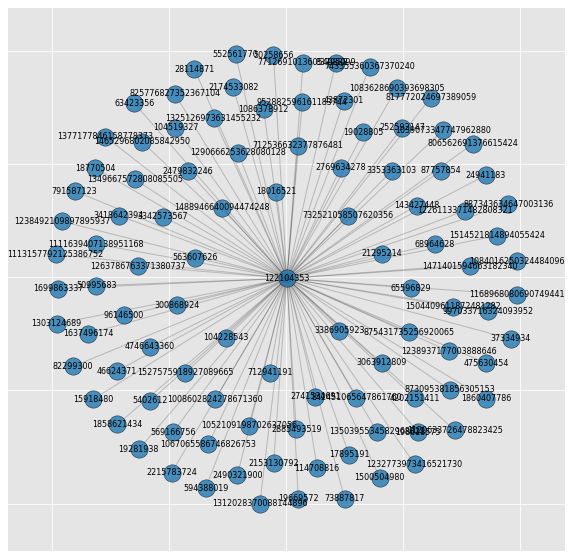

In [ ]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(10, 10))
plt.style.use('ggplot')
nodes = nx.draw_networkx_nodes(G, pos,
                               alpha=0.8)
nodes.set_edgecolor('k')
nx.draw_networkx_labels(G, pos, font_size=8)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.2)

In [ ]:
user = client.get_user(username='c_lindner')
followers = []

followers = client.get_users_following(id = user.data.id, )

In [ ]:
user_list = list(df['target'][:30]) 
for userID in user_list:
    
    followers = []
    follower_list = []
    followers_ext = []
    
   
    followers = client.get_users_following(userID, max_results=500)
    
    people = []
    numbers = []
    for i in followers[0]:
            people.append(str(i))
    
    x = str(followers[0]).split('User id=')

    for i in x[1:]:
        numbers.append(i.split(' ', 1)[0])
    numbers[:4]

        
    followers_ext.extend(numbers)
    follower_list.append(followers_ext)
    
    temp = pd.DataFrame(columns=['source', 'target'])
    temp['target'] = follower_list[0]
    temp['source'] = userID
    df = df.append(temp)
    df.to_csv("networkOfFollowers.csv")

In [ ]:
df = pd.read_csv('networkOfFollowers.csv') #Read into a df
G = nx.from_pandas_edgelist(df, 'source', 'target')

In [ ]:
df.target.nunique()

4872

In [ ]:
G.number_of_nodes() #Find the total number of nodes in this graph

4872

In [ ]:
G_sorted = pd.DataFrame(sorted(G.degree, key=lambda x: x[1], reverse=True))
G_sorted.columns = ['nconst','degree']
G_sorted.head()

,nconst,degree
0,1527575918927089665,503
1,50258656,503
2,28114871,502
3,712536632377876481,502
4,4746643360,501


In [ ]:
G_tmp = nx.k_core(G, 10) #Exclude nodes with degree less than 10

In [ ]:
G_sorted.degree.value_counts()

1      4329
2       415
3        87
4        14
5         6
500       4
6         3
502       2
503       2
100       1
86        1
9         1
7         1
160       1
164       1
189       1
289       1
501       1
91        1
Name: degree, dtype: int64

In [ ]:
G_tmp = G.copy()

In [ ]:

from community import community_louvain

partition = community_louvain.best_partition(G_tmp)
partition1 = pd.DataFrame([partition]).T
partition1 = partition1.reset_index()
partition1.columns = ['names','group']

In [ ]:
G_sorted = pd.DataFrame(sorted(G_tmp.degree, key=lambda x: x[1], reverse=True))
G_sorted.columns = ['names','degree']
G_sorted.head()
dc = G_sorted

In [ ]:
combined = pd.merge(dc,partition1, how='left', left_on="names",right_on="names")

In [ ]:
combined.head()

,names,degree,group
0,1527575918927089665,503,1
1,50258656,503,8
2,28114871,502,4
3,712536632377876481,502,13
4,4746643360,501,3


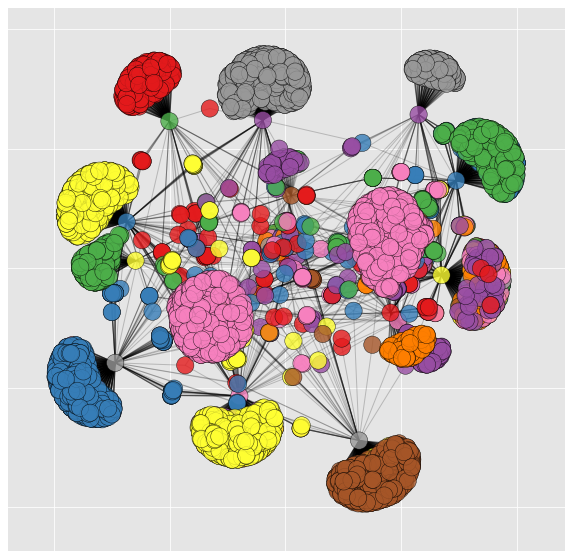

In [ ]:
pos = nx.spring_layout(G_tmp)
f, ax = plt.subplots(figsize=(10, 10))
plt.style.use('ggplot')
#cc = nx.betweenness_centrality(G2)
nodes = nx.draw_networkx_nodes(G_tmp, pos,
                               cmap=plt.cm.Set1,
                               node_color=combined['group'],
                               alpha=0.8)
nodes.set_edgecolor('k')
#nx.draw_networkx_labels(G_tmp, pos, font_size=8)
nx.draw_networkx_edges(G_tmp, pos, width=1.0, alpha=0.2)
plt.savefig('twitterFollowers.png')

In [ ]:
'''combined = combined.rename(columns={"names": "Id"}) 
edges = nx.to_pandas_edgelist(G_tmp)
nodes = combined['Id']
edges.to_csv("edges.csv")
combined.to_csv("nodes.csv")'''